# Health Insurance Marketplace Data Analysis

Health Insurance Marketplace Data Analysis.

DataSet used: U.S. Department of Health and Human Services Data (https://www.kaggle.com/hhsgov/health-insurance-marketplace)

The dataset consists of health insurance and dental plans offered through healthcare.gov between 2014 and 2016. 
It encompasses rates for smokers and non-smokers, separately listed for each age group, benefits included in the plans, states in which the plans were offered, and other information. 
Steps Followed in Analysis:
1.Data cleaning from given raw data
2.Analysis of the plan rates with respect to smokers and non-smokers, age groups and U.S. states.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import the CSV file containing the health dataset into Dataframe

In [2]:
df = pd.read_csv("Rate.csv")
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

## Data Validations and further analysis

Priting few of the rows and all columns from data csv file

In [3]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


From the complete data ,we are more interested in columns below after looking at the data.

BusinessYear, StateCode, Age, PlanId, IndividualRate, IndividualTobaccoRate and all the family/couple rates. 
Data is further broke down into individual U.S. states:

In [7]:
states = df["StateCode"].value_counts()
plans = df["PlanId"].value_counts()
states
no_of_states = len(states)
no_of_plans = len(plans)
no_of_states, no_of_plans

(39, 16808)

**Observations from above breakdown:**
1.Number of states for which data is present: 39 states
2.Number of health insurance plans: 16808 
3.From the states data,is clear that not all states make use of the federal network healthcare.gov. 
as some states have their own health insurance marketplace eg: NY 
4.Some states offer significantly more plans than others. This may be due to the different sizes of the states
and not all states have offered plans through healthcare.gov in for all  three years.

## Data cleaning -The most Important step before further analysis and plotting 

Clean-up step includes typos, non-sensical unique values, NaN' values.
Identifying unique values in the columns that contain categories to see if there are any strange values:

In [7]:
df['Age'].unique()  

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

Plotting Histogram of Individual Rate if it looks good.

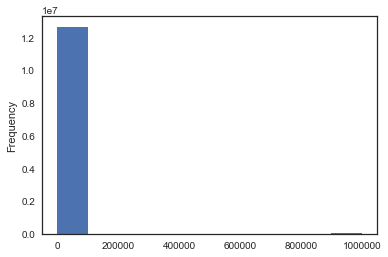

In [8]:
df['IndividualRate'].plot.hist()

There is a problem with  individual rates. Sorting the values further using this column.Fixing the 0, 999999, etc, entries by specifying a list of NaN values before reading in the CSV file. We can also leave out some of the columns to save memory.

In [8]:
df.sort_values(by='IndividualRate') 
na_values = ['NaN', 'N/A', '0', '0.01', '9999', '9999.99', '999999']
df = pd.read_csv("Rate.csv", na_values=na_values, usecols=['BusinessYear', 'StateCode', 'PlanId', 'RatingAreaId','Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate','Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents'])

Now we should get rid of duplicates within this reduced dataframe:

In [10]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(12442241, 15)

Analysis: The raw dataset was quite clean already. Only about 250,000 rows in the dataframe contained (for our purposes) redundant data. 

For the further analysis,I  will focus on 15 of the 24 columns.

## More data cleaning based on a first in-depth look at the data with some basic plots

The data covers three consecutive years. Let's see how the years compare.

In [11]:
df["BusinessYear"].value_counts()

2015    4585265
2016    4180939
2014    3676037
Name: BusinessYear, dtype: int64

The data seems to be more or less evenly distributed over the three years. Let's have a look at trends over the years.

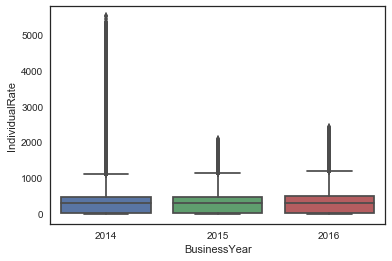

In [12]:
sns.boxplot(x="BusinessYear", y="IndividualRate", data=df)

***Observation 1 *** : Looking at the end data in  2014,these outliers make the boxchart unreadable. Need to break it down by states to narrow down the outliers. 

In [13]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

Now with this sorted list of state names, drawing boxplot for all 34 states.

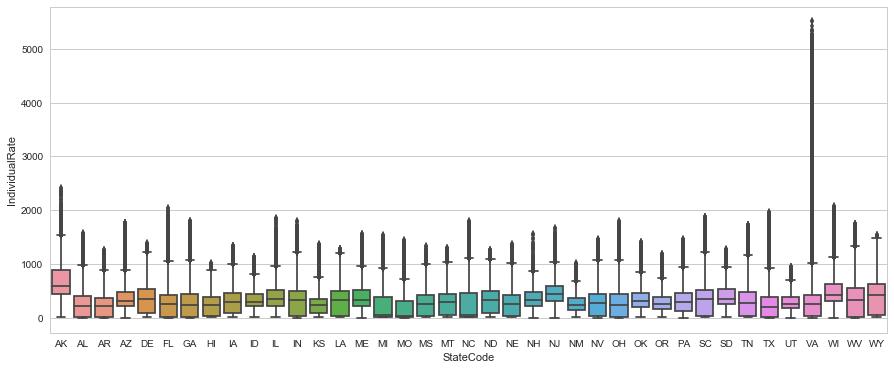

In [23]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df, order=Statelist)

***Observation2 *** :  Virginia is the one state that's causing the outliers in the 2014 statistics. Taking look at VA in 2014 in more detail.

*** Analysing  the case of Virginia Further ***

For the further exploration, spliting the dataframe into three separate dataframes.

In [15]:
df2014 = df[df['BusinessYear'].isin([2014])].copy()
df2015 = df[df['BusinessYear'].isin([2015])].copy()
df2016 = df[df['BusinessYear'].isin([2016])].copy()

In [16]:
df2014.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,3676037.0,3.549143e+06,1.601995e+06,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000
mean,2014.0,3.174200e+02,5.601592e+02,48.318870,48.799154,68.371658,92.581684,71.081461,90.425835,114.622133
std,0.0,2.876297e+02,3.345296e+02,19.841312,18.060111,29.339670,45.725490,30.832572,42.059903,58.095334
min,2014.0,6.000000e+00,5.566000e+01,10.000000,10.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,2014.0,3.288000e+01,3.412000e+02,31.570000,33.590000,44.460000,53.670000,48.452500,61.860000,73.900000
50%,2014.0,2.937000e+02,4.759600e+02,46.355000,47.735000,69.485000,96.300000,71.330000,93.490000,119.640000
75%,2014.0,4.609400e+02,6.953100e+02,60.360000,60.360000,87.470000,121.387500,90.937500,117.405000,151.345000
max,2014.0,5.503850e+03,6.604610e+03,182.400000,169.650000,248.110000,357.940000,260.850000,339.310000,449.140000


The 2014 data looks similar to the 2014-1016 dataset. But with just 1/3 of the rows it's much easier to handle.

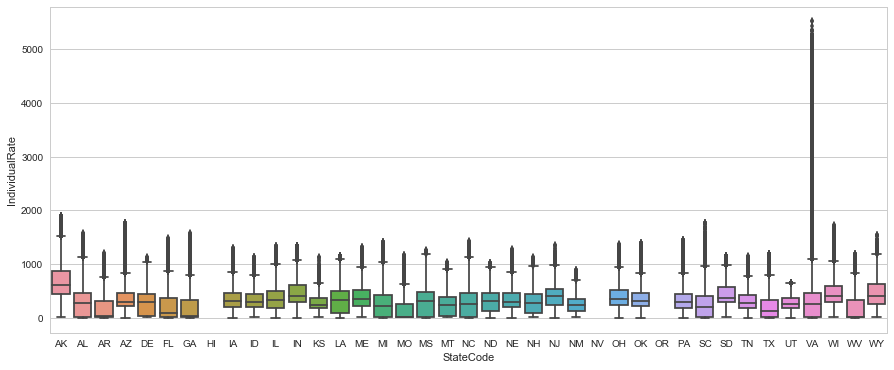

In [17]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2014, order=Statelist)

I have created a separate Virginia 2014 dataframe to get more detailing of Virgina Case

In [18]:
df2014_va = df2014[df2014['StateCode'].isin(['VA'])].copy()

In [19]:
df2014_va.shape

(119574, 15)

In [20]:
df2014_va.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,119574.0,115254.000000,61318.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2014.0,396.495291,768.124408,46.957630,48.706185,63.087185,79.605333,67.665704,82.046667,98.564593
std,0.0,613.186797,863.353308,17.501699,20.158233,28.306539,40.991590,34.949403,43.313799,55.020378
min,2014.0,10.010000,63.390000,25.350000,25.350000,25.350000,25.350000,25.350000,25.350000,25.350000
25%,2014.0,31.840000,335.602500,31.180000,31.180000,31.180000,31.180000,31.180000,31.180000,31.180000
50%,2014.0,256.845000,473.315000,47.760000,47.370000,70.100000,91.605000,71.315000,94.760000,117.590000
75%,2014.0,460.087500,768.180000,59.290000,60.895000,85.370000,111.625000,92.137500,117.012500,141.272500
max,2014.0,5503.850000,6604.610000,86.750000,107.170000,112.280000,149.040000,151.120000,151.120000,187.810000


Maybe the very high rates are for old individuals. I plot the plan costs by category 'Age' to see how prices compare across the individuals' ages. 
I have to exclude the "Family Option" rates first, since they are also a category of the 'Age' column.

In [21]:
exclude_list = df2014_va['Age'].isin(['Family Option'])
df2014_va_wofamily = df2014_va[~exclude_list]
age_labels = df2014_va_wofamily['Age'].unique()
age_labels = ['65+' if x=='65 and over' else x for x in age_labels]  #replace label '65 and over' with '65+' for plot labels
len(age_labels), age_labels

(46,
 ['0-20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65+'])

Creating  boxplot for each age group.

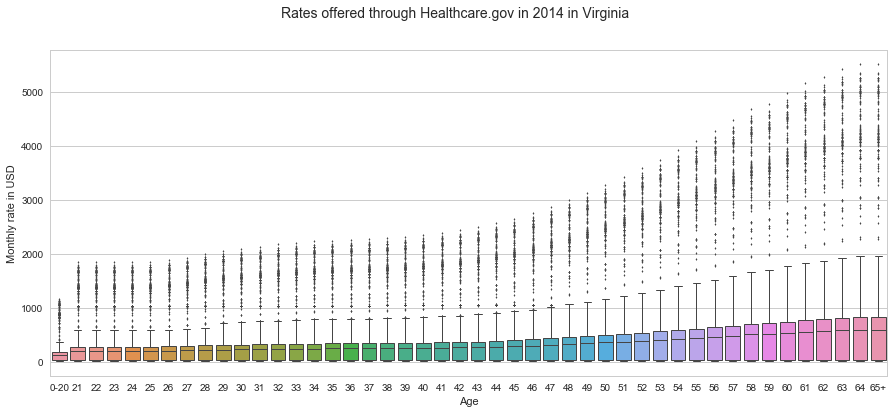

In [22]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Rates offered through Healthcare.gov in 2014 in Virginia', fontsize=14)

ax = sns.boxplot(x="Age", y="IndividualRate", data=df2014_va_wofamily, linewidth=1.0, fliersize=2.0)
ax.set_ylabel("Monthly rate in USD")

# Customize x tick lables
xticks = np.arange(46)
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(age_labels)

plt.savefig('Virginia_rates_by_age.png', bbox_inches='tight', dpi=150)

**Observation 3 ** The large spread in premiums in Virginia is real. After some internet research it turns out that the wide range in monthly premiums in Virginia is due to plans covering gastric bypasses! In all other states, this type of surgery is covered by all plans, so the cost for these surgeries is distributed among all payees (http://www.webmd.com/health-insurance/20131011/why-some-virginia-health-plans-cost-so-much).

We will take another case of Montana where there are really low premiums.

### The case of Montana

Creating df for Montana 2014 to ease the exploration process

In [24]:
df2014_mo = df2014[df2014['StateCode'].isin(['MO'])].copy()

Montana seem to have a large number of plans with rates <$100. Let's look at a histogram:

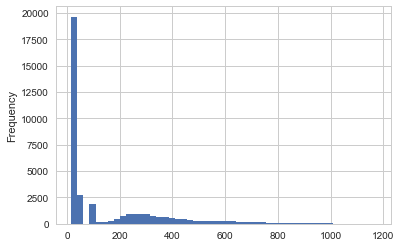

In [25]:
df2014_mo['IndividualRate'].plot.hist(50)

These low-cost plans make up the majority of plans, actually.

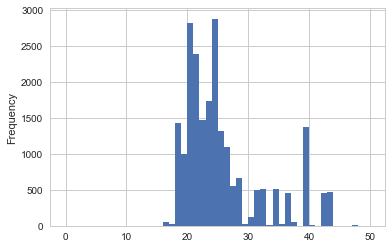

In [26]:
df2014_mo['IndividualRate'].plot.hist(50, range=(0, 50))

*** A summary of the Montana 2014 dataframe ***

In [28]:
df2014_mo.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,40618.0,37018.000000,12512.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2014.0,157.784407,483.698700,49.273913,50.552304,72.199000,99.969522,76.618478,98.264826,126.035652
std,0.0,207.228153,234.649054,11.172008,10.261092,16.476146,29.757290,15.987663,20.807315,32.921070
min,2014.0,16.140000,68.220000,32.280000,31.760000,44.350000,44.350000,47.900000,63.510000,70.210000
25%,2014.0,23.190000,314.490000,40.555000,43.200000,60.295000,79.712500,64.912500,82.810000,101.420000
50%,2014.0,32.050000,418.125000,48.610000,50.170000,70.475000,100.670000,75.050000,96.050000,123.935000
75%,2014.0,265.477500,608.855000,55.130000,56.425000,82.935000,116.547500,85.395000,110.420000,143.427500
max,2014.0,1170.570000,1463.190000,80.970000,80.160000,119.880000,179.450000,120.680000,160.400000,219.980000


*** Observation 4*** : It's interesting that all couple/family plans have a price range comparable to the low-price bump in the individual rates.

In [29]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12


** Observation 5 : ** The low-cost plans are actually dental-only plans. Excluding them if we want to say anything about health insurance premiums.We can read in another CSV file that can give us some insights on which is which.

### Distinguishing between full plans and dental-only plans

The CSV file PlanAttributes.csv contains benefits, copays, deductibles and many more details of the individual health insurance plans. The file also lists full health insurance plans and dental-only plans. This is what we have to use to clean our dataset.

In [30]:
na_values = ['NaN', 'N/A', '0', '']
dental = pd.read_csv("PlanAttributes.csv", na_values=na_values)

C:\Users\radhi\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
dental.head()

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,DEHBCombInnOonFamilyPerGroupMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonIndividualMOOP,DEHBDedCombInnOonFamily,DEHBDedCombInnOonFamilyPerGroup,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonIndividual,DEHBDedInnTier1Coinsurance,DEHBDedInnTier1Family,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1Individual,DEHBDedInnTier2Coinsurance,DEHBDedInnTier2Family,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2Individual,DEHBDedOutOfNetFamily,DEHBDedOutOfNetFamilyPerGroup,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetIndividual,DEHBInnTier1FamilyMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2IndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetIndividualMOOP,DentalOnlyPlan,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,EHBPercentTotalPremium,FirstTierUtilization,FormularyId,FormularyURL,HIOSProductId,HPID,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ImportDate,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,InpatientCopaymentMaximumDays,IsGuaranteedRate,IsHSAEligible,IsNewPlan,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,IssuerActuarialValue,IssuerId,IssuerId2,MEHBCombInnOonFamilyMOOP,MEHBCombInnOonFamilyPerGroupMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonIndividualMOOP,MEHBDedCombInnOonFamily,MEHBDedCombInnOonFamilyPerGroup,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonIndividual,MEHBDedInnTier1Coinsurance,MEHBDedInnTier1Family,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1Individual,MEHBDedInnTier2Coinsurance,MEHBDedInnTier2Family,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2Individual,MEHBDedOutOfNetFamily,MEHBDedOutOfNetFamilyPerGroup,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetIndividual,MEHBInnTier1FamilyMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2IndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetIndividualMOOP,MarketCoverage,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MetalLevel,MultipleInNetworkTiers,NationalNetwork,NetworkId,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,PlanBrochure,PlanEffictiveDate,PlanExpirationDate,PlanId,PlanLevelExclusions,PlanMarketingName,PlanType,QHPNonQHPTypeId,RowNumber,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesCopayment,SBCHavingDiabetesDeductible,SBCHavingDiabetesLimit,SBCHavingaBabyCoinsurance,SBCHavingaBabyCopayment,SBCHavingaBabyDeductible,SBCHavingaBabyLimit,SecondTierUtilization,ServiceAreaId,SourceName,SpecialistRequiringReferral,SpecialtyDrugMaximumCoinsurance,StandardComponentId,StateCode,StateCode2,TEHBCombInnOonFamilyMOOP,TEHBCombInnOonFamilyPerGroupMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonIndividualMOOP,TEHBDedCombInnOonFamily,TEHBDedCombInnOonFamilyPerGroup,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonIndividual,TEHBDedInnTier1Coinsurance,TEHBDedInnTier1Family,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1Individual,TEHBDedInnTier2Coinsurance,TEHBDedInnTier2Family,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2Individual,TEHBDedOutOfNetFamily,TEHBDedOutOfNetFamilyPerGroup,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutO

Well, this is a big messy dataframe. We are only interested in the column DentalOnlyPlan. Let's have a look at it:

In [34]:
dental['DentalOnlyPlan'].unique()

array(['Yes', 'No'], dtype=object)

This  one is clean!

In [35]:
len(dental['HIOSProductId'].unique())
len(df['PlanId'].unique())

16808

These PlanId's from the Rate.csv file are not exactly the same as the HIOSProductId's from the PlanAttributes.csv file. The format is similar: 29416MO0010001 versus 21989AK002. I can try to strip the last four digits from the PlanId's to see if the number of PlanId's and HIOSProductId's matches then.

In [38]:
Ids = df.PlanId
mod_Ids = [x[:-4] for x in Ids]
len(set(mod_Ids))

3498

There is one more element in the modified PlanId list than in the dental list. Let's find it.

In [39]:
set(mod_Ids)-set(dental['HIOSProductId'].unique())

{'19312TZ001'}

TZ is not a valid State abbreviation. There's a plan in Texas with name 19312TX001, though. So let's change this typo.

In [40]:
mod_Ids = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids]
set(mod_Ids)-set(dental['HIOSProductId'].unique())

set()

Now adding these new labels as a new column to the original dataframe and then merge the dental dataframe.

In [41]:
df.loc[:,'HIOSProductId'] = pd.Series(mod_Ids, index=df.index)

In [42]:
df.shape

(12442241, 16)

Success. Now doing this for the dfs of the individual three years

In [43]:
Ids_2014 = df2014.PlanId
mod_Ids_2014 = [x[:-4] for x in Ids_2014]
Ids_2015 = df2015.PlanId
mod_Ids_2015 = [x[:-4] for x in Ids_2015]
Ids_2016 = df2016.PlanId
mod_Ids_2016 = [x[:-4] for x in Ids_2016]

In [44]:
mod_Ids_2014 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2014]
mod_Ids_2015 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2015]
mod_Ids_2016 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2016]

In [45]:
df2014.loc[:,'HIOSProductId'] = mod_Ids_2014
df2015.loc[:,'HIOSProductId'] = mod_Ids_2015
df2016.loc[:,'HIOSProductId'] = mod_Ids_2016

In [46]:
len(set(df2014['HIOSProductId']))

1836

Creating a diet version of the dental DataFrame before we merge it with the dfs. We only need the DentalOnlyPlan column.

In [47]:
dental_diet = dental[['HIOSProductId', 'DentalOnlyPlan']].copy()
dental_diet.shape

(77353, 2)

In [48]:
dental_diet.head()

,HIOSProductId,DentalOnlyPlan
0,21989AK002,Yes
1,21989AK002,Yes
2,21989AK002,Yes
3,21989AK001,Yes
4,21989AK001,Yes


In [49]:
dental_diet['DentalOnlyPlan'].value_counts()

No     65704
Yes    11649
Name: DentalOnlyPlan, dtype: int64

Merging two dataframes can be a bit tricky. Since it is likely that we will have to try several times until it works the way we imagine them to be merged, we should test the merging process on a smaller df first. Let's use the 2014 df.

Now, not all the PlanId's are in the 2014 df. If we merge the full dental df with the 2014 df, we will get spurious rows with the PlanId's that are not used in 2014. We should create a 2014 dental df to avoid these spurious entries after merging.

In [50]:
not_in_2014 = set(dental_diet['HIOSProductId'])-set(df2014['HIOSProductId'])
exclude_list_2014 = dental_diet['HIOSProductId'].isin(not_in_2014)
dental_2014 = dental_diet[~exclude_list_2014].drop_duplicates().reset_index(drop=True)

In [51]:
dental_2014['DentalOnlyPlan'].value_counts()

Yes    1074
No      762
Name: DentalOnlyPlan, dtype: int64

And similar for 2015 and 2016:

In [52]:
not_in_2015 = set(dental_diet['HIOSProductId'])-set(df2015['HIOSProductId'])
exclude_list_2015 = dental_diet['HIOSProductId'].isin(not_in_2015)
dental_2015 = dental_diet[~exclude_list_2015].drop_duplicates().reset_index(drop=True)

In [53]:
not_in_2016 = set(dental_diet['HIOSProductId'])-set(df2016['HIOSProductId'])
exclude_list_2016 = dental_diet['HIOSProductId'].isin(not_in_2016)
dental_2016 = dental_diet[~exclude_list_2016].drop_duplicates().reset_index(drop=True)

Merging the slim dental dataframe with the full dataframe containing all rates across all three years crashes as the Jupyter notebook runs out of memory. Let's just merge the 2014, 2015 and 2016 dental df's with the df's of the individual years -- and let's save them right away as CSV files so that we can start our further analysis from there.

In [54]:
df2014_merged = pd.merge(df2014, dental_2014, on='HIOSProductId', how='inner', sort=False)

In [55]:
df2014_merged.shape

(3676037, 17)

In [56]:
df2014_merged.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
0,2014,AK,21989AK0010001,Rating Area 1,No Preference,0-20,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
1,2014,AK,21989AK0010001,Rating Area 1,No Preference,21,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
2,2014,AK,21989AK0010001,Rating Area 1,No Preference,22,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
3,2014,AK,21989AK0010001,Rating Area 1,No Preference,23,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
4,2014,AK,21989AK0010001,Rating Area 1,No Preference,24,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes


Now checking for any duplicates that we should drop:

In [57]:
df2014_cleaned = df2014_merged.drop_duplicates().reset_index(drop=True)

In [58]:
df2014_cleaned.shape

(3676037, 17)

No, the merging was clean.

How many dental only plans are there in 2014?

In [59]:
df2014_cleaned['DentalOnlyPlan'].value_counts()

No     2370659
Yes    1305378
Name: DentalOnlyPlan, dtype: int64

**Observation 6:** One third of all listed plans are dental-only plans.

The goal was to remove these dental-only plans so that we can get some statistics on the prizes of health insurance plans for individuals. So let's get rid of the dental-only plans!

In [60]:
df2014_merged_nodental = df2014_cleaned[df2014_cleaned['DentalOnlyPlan'].isin(['No'])].copy()

In [61]:
df2014_merged_nodental.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
1398,2014,AK,73836AK0620001,Rating Area 1,No Preference,0-20,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1399,2014,AK,73836AK0620001,Rating Area 1,No Preference,21,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1400,2014,AK,73836AK0620001,Rating Area 1,No Preference,22,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1401,2014,AK,73836AK0620001,Rating Area 1,No Preference,23,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1402,2014,AK,73836AK0620001,Rating Area 1,No Preference,24,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No


Df to each file

In [62]:
df2014_merged_nodental.to_csv("Rates2014.csv")

In [63]:
df2015_merged = pd.merge(df2015, dental_2015, on='HIOSProductId',how='inner', sort=False)

In [64]:
df2015_cleaned = df2015_merged.drop_duplicates().reset_index(drop=True)

In [65]:
df2015_merged_nodental = df2015_cleaned[df2015_cleaned['DentalOnlyPlan'].isin(['No'])]

In [66]:
df2015_merged_nodental.to_csv("Rates2015.csv")

In [67]:
df2016_merged = pd.merge(df2016, dental_2016, on='HIOSProductId',how='inner', sort=False)

In [68]:
df2016_cleaned = df2016_merged.drop_duplicates().reset_index(drop=True)

In [69]:
df2016_merged_nodental = df2016_cleaned[df2016_cleaned['DentalOnlyPlan'].isin(['No'])]

In [70]:
df2016_merged_nodental.to_csv("Rates2016.csv")

### The cleaned datasets for full health insurance plan rates (the case of Montana continued)

Now that we have removed all the dental-only plans, we can actually have a look at the distribution of plan rates in Montana

In [71]:
Ids_mo = df2014_mo.PlanId
mod_Ids_mo = [x[:-4] for x in Ids_mo]
len(set(mod_Ids_mo))
Ids_mo.shape

(40618,)

In [72]:
mod_Ids_mo = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_mo]
set(mod_Ids_mo)-set(dental['HIOSProductId'].unique())

set()

In [73]:
df2014_mo.loc[:,'HIOSProductId']= mod_Ids_mo

In [74]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12,29416MO001


In [75]:
len(set(mod_Ids_mo)), len(set(df2014_mo['HIOSProductId'])), len(set(dental_diet['HIOSProductId']))

(73, 73, 3497)

In [76]:
not_in_mo = set(dental_diet['HIOSProductId'])-set(df2014_mo['HIOSProductId'])
exclude_list = dental_diet['HIOSProductId'].isin(not_in_mo)
len(exclude_list)

77353

In [77]:
dental_mo = dental_diet[~exclude_list].drop_duplicates().reset_index(drop=True)

dental_mo.head()

,HIOSProductId,DentalOnlyPlan
0,32753MO077,No
1,32753MO081,Yes
2,32753MO084,Yes
3,44527MO015,No
4,44527MO016,No


In [78]:
df2014_mo.tail()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
2538347,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,61,1096.43,1370.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538348,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,62,1121.02,1401.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538349,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,63,1151.84,1439.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538350,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,64,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538351,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,65 and over,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093


In [79]:
df2014_mo_merged = pd.merge(df2014_mo, dental_mo, left_on='HIOSProductId', right_on='HIOSProductId', how='inner', sort=False)

In [80]:
df2014_mo_merged.shape

(40618, 17)

In [81]:
df2014_mo_cleaned = df2014_mo_merged.drop_duplicates().reset_index(drop=True)

In [82]:
df2014_mo_cleaned.shape

(40618, 17)

In [83]:
df2014_mo_merged_nodental = df2014_mo_cleaned[df2014_mo_cleaned['DentalOnlyPlan'].isin(['No'])]

In [85]:
df2014_mo_merged_nodental.shape

(12788, 17)

Clean..excited to see the clean distribution of plan rates:

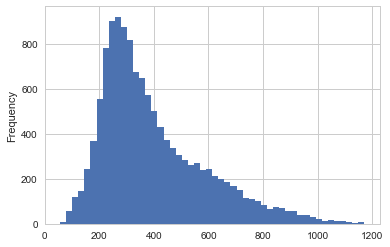

In [86]:
df2014_mo_merged_nodental['IndividualRate'].plot.hist(50)

Calculating  the median of this asymmetric distribution

In [87]:
df2014_mo_merged_nodental['IndividualRate'].median()

343.015

*** Observation 7 ***: The median monthly premium in 2014 in Montana was about $340. That's a reasonable number!

##  Data Cleaning Phase Completed.Actual Analysis Phase

Breaking the whole dataset down by year to see some trends on the individual types of rates.

Reading the cleaned dataframes

In [88]:
df2014 = pd.read_csv("Rates2014.csv")
df2015 = pd.read_csv("Rates2015.csv")
df2016 = pd.read_csv("Rates2016.csv")

In [89]:
df2014.describe()

,Unnamed: 0,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,2.370659e+06,2370659.0,2.370659e+06,1.601995e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.870614e+06,2014.0,4.524658e+02,5.601592e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.066630e+06,0.0,2.468284e+02,3.345296e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.398000e+03,2014.0,4.907000e+01,5.566000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.055422e+06,2014.0,2.902200e+02,3.412000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.815117e+06,2014.0,3.872100e+02,4.759600e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.754092e+06,2014.0,5.610200e+02,6.953100e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.656258e+06,2014.0,5.503850e+03,6.604610e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Observation 8 ***: All the couple and family rates were dental-only plans. Maybe that was clear to anyone else. 

In [96]:
df2014.median(numeric_only=True)

Unnamed: 0                                   1815117.00
BusinessYear                                    2014.00
IndividualRate                                   387.21
IndividualTobaccoRate                            475.96
Couple                                              NaN
PrimarySubscriberAndOneDependent                    NaN
PrimarySubscriberAndTwoDependents                   NaN
PrimarySubscriberAndThreeOrMoreDependents           NaN
CoupleAndOneDependent                               NaN
CoupleAndTwoDependents                              NaN
CoupleAndThreeOrMoreDependents                      NaN
dtype: float64

Comparing smoker and non-smoker rates then! We can start with simple statistics such as median, mean and standard deviation

In [97]:
dfmedian2014 = df2014[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2015 = df2015[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2016 = df2016[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmean2014 = df2014[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2015 = df2015[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2016 = df2016[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfstd2014 = df2014[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2015 = df2015[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2016 = df2016[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)

Combining these statistics in dataframes. This will enable us to plot them conveniently with Pandas and Seaborn.

In [98]:
dfmedians = pd.concat([dfmedian2014,dfmedian2015,dfmedian2016], keys=['2014', '2015', '2016'], axis=1)
dfmeans = pd.concat([dfmean2014,dfmean2015,dfmean2016], keys=['2014', '2015', '2016'], axis=1)
dfstd = pd.concat([dfstd2014,dfstd2015,dfstd2016], keys=['2014', '2015', '2016'], axis=1)
dfstd

,2014,2015,2016
IndividualRate,246.828415,229.156813,237.808886
IndividualTobaccoRate,334.529592,272.904169,272.979168


The standard deviation of the plan rates is quite high, and it's not really what I was interested in. We want to compare the medians of the plan rates for different categories. I would like to know how sensitive this statistic is to the sampling of the distribution function of plan rates. We can estimate that with bootstrapping:  

We can use these uncertainties now to see if there has been a significant increase in the median prize rates between 2014 and 2016.

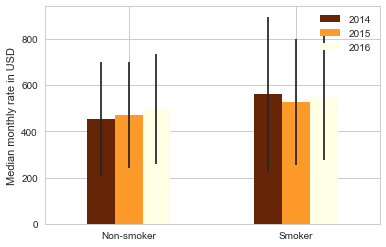

In [105]:
fig = plt.figure(figsize=(6, 6))

ax = dfmeans.plot.bar(yerr=dfstd, rot=0, colormap='YlOrBr_r')
ax.set_ylabel("Median monthly rate in USD")
ax.set_xlabel("")

# Customize x tick lables
labels = ['Non-smoker', 'Smoker']
xticks = [0,1]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(labels)

plt.savefig('Overall_rates.png', bbox_inches='tight', dpi=150)

**Observation 9** There has been a significant increase in premiums for non-smokers in the years 2014-2016. In the same period, the median rates for smokers remained roughly constant. 

Let us look at the individual rates for each of the three years broken down by states. Did the prizes go up in all of the states?

In [106]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

2016 first. We can use Seaborn's barplot to show the data for the 38 states. It offers us the possibility to select an estimator for a quanity that we want to compare across categories (which we can set to numpy's median) and even includes a bootstrapping routine like the one we used above.

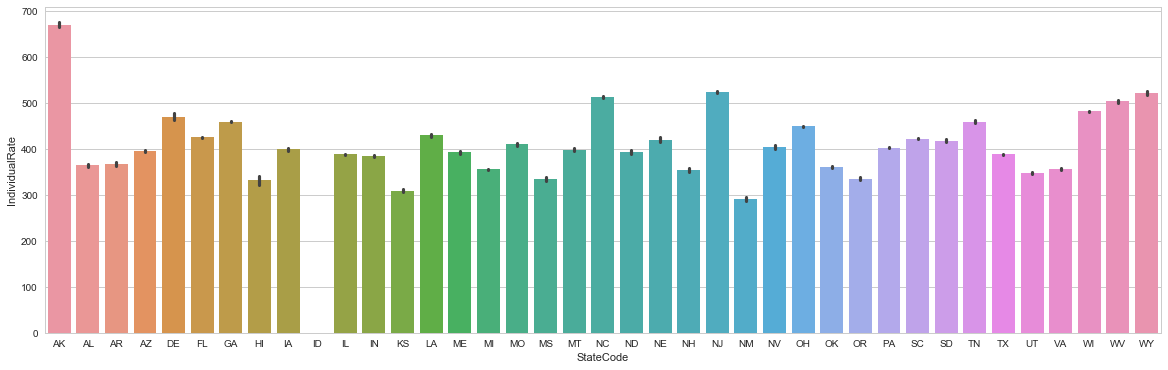

In [107]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2016['StateCode'], y=df2016['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

**Observation 10:** median health insurance rates for non-smokers (and smokers as well) vary strongly between the states that participated in the health insurace marketplace.

Let's also look at the other years. 2015:

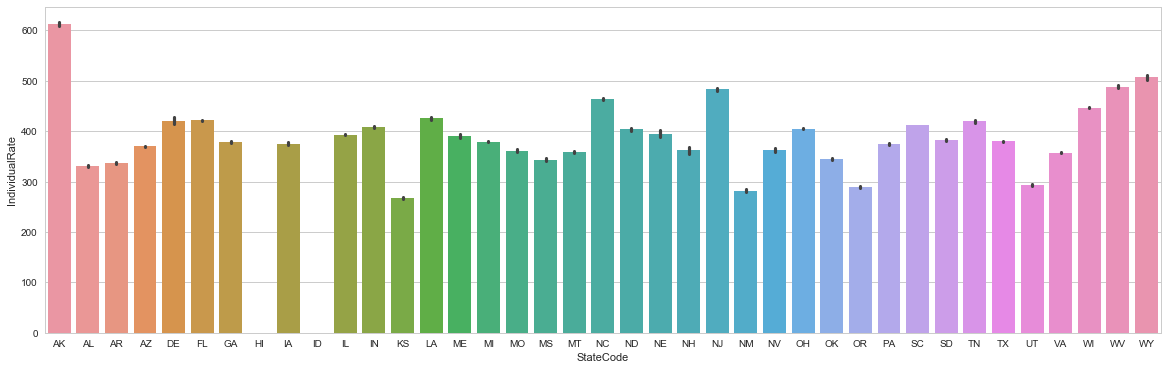

In [108]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2015['StateCode'], y=df2015['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

2014:

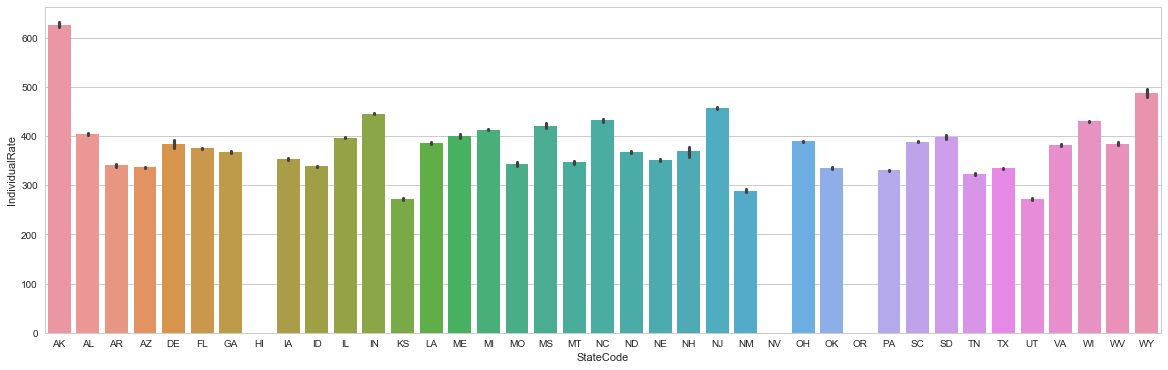

In [109]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2014['StateCode'], y=df2014['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

**Observation 11:** Not all states participated in the federal health insurance marketplace in all three years. 

Other than that, these three plots don't tell us much. We can combine all of them into one figure to see how the median rates changed with the years.

In [109]:
df = pd.concat([df2014,df2015,df2016])

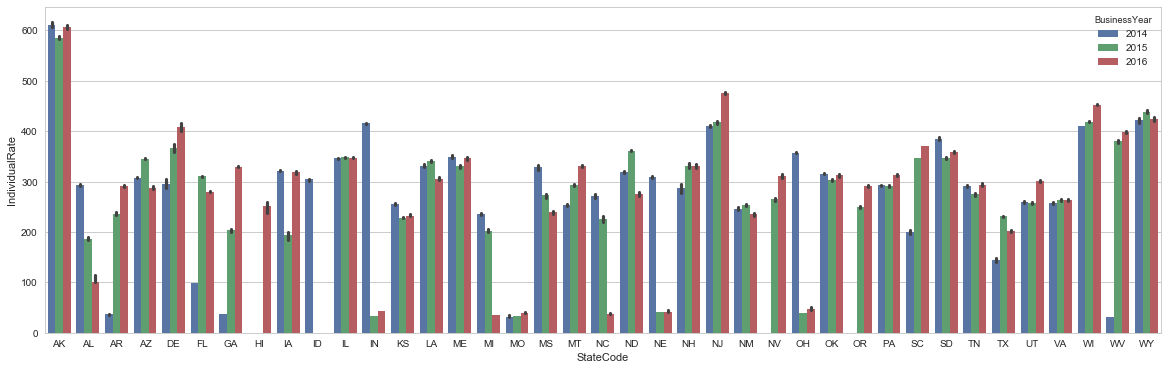

In [110]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df['StateCode'], y=df['IndividualRate'], hue=df['BusinessYear'], order=Statelist, estimator=np.median, ci=95, n_boot=100)

**Observation 12:** Median plan rates significantly increased for about 25 states that participated in the marketplace between 2014 and 2016. A decrease can be observed in about 8 states.

Making  a sorted comparison plot of median, non-smoker plan rates across all states that participated in the program.

In [111]:
Statelist = df['StateCode'].unique()
State_medians = [] 
for state in Statelist:
    State_medians.append(np.median(df[df['StateCode'].isin([state])].IndividualRate))

C:\Users\radhi\Anaconda\lib\site-packages\numpy\lib\function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


First we make a list of the states in the dataset.

In [112]:
Statelist

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

Then we add the median plan rates as a second column.

In [113]:
Statelist_ordered_by_rate = np.column_stack((np.asarray(Statelist), State_medians))
Statelist_ordered_by_rate

array([['AK', nan],
       ['AL', nan],
       ['AZ', nan],
       ['FL', nan],
       ['GA', nan],
       ['IN', nan],
       ['LA', nan],
       ['MO', nan],
       ['MS', nan],
       ['NC', nan],
       ['ND', nan],
       ['NJ', nan],
       ['OK', nan],
       ['PA', nan],
       ['SC', nan],
       ['TN', nan],
       ['TX', nan],
       ['WI', nan],
       ['WY', nan],
       ['AR', nan],
       ['DE', nan],
       ['IL', nan],
       ['KS', nan],
       ['ME', nan],
       ['MI', nan],
       ['MT', nan],
       ['NH', nan],
       ['NM', nan],
       ['VA', nan],
       ['WV', nan],
       ['IA', nan],
       ['ID', nan],
       ['NE', nan],
       ['OH', nan],
       ['SD', nan],
       ['UT', nan],
       ['NV', nan],
       ['OR', nan],
       ['HI', nan]], dtype=object)

This array we can sort by the premiums.

In [114]:
Statelist_ordered_by_rate = Statelist_ordered_by_rate[Statelist_ordered_by_rate[:, 1].argsort()]

Which we can then use as labels for our ordered plot.

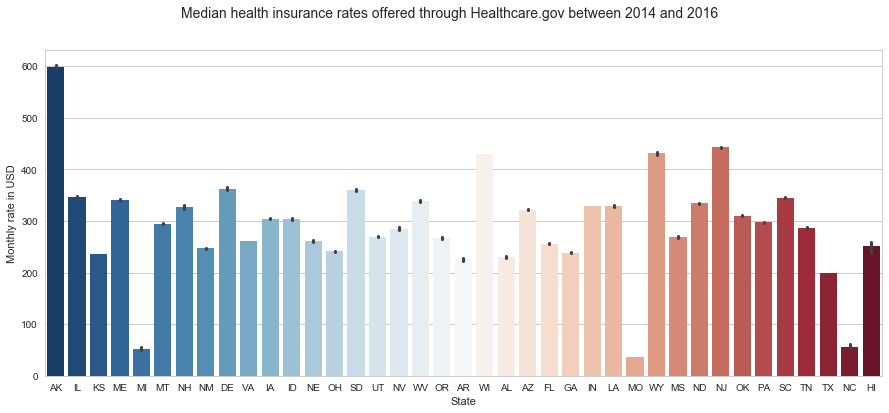

In [115]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Median health insurance rates offered through Healthcare.gov between 2014 and 2016', fontsize=14)

ax = sns.barplot(x=df['StateCode'], y=df['IndividualRate'], order=Statelist_ordered_by_rate[:,0], estimator=np.median, ci=95, n_boot=100, palette="RdBu_r")
ax.set_ylabel("Monthly rate in USD")
ax.set_xlabel("State")

plt.savefig('Median_rates_by_state.png', bbox_inches='tight', dpi=150)

**Observation 13: Health insurance for non-smoking individuals is cheapest in Kansas and most expensive in Alaska. The median rate is about twice as high in Alaska as it is in Kansas, New Mexico, Utah, Oregon or Hawaii. ***